GEOSTORY PROJECT
ELECTROPUBLISHING AND DIGITAL STORYTELLING EXAM (DHDK MASTER DEGREE)
A project by Ariele Santello, Giulia Massimino, Benedetta Togni and Szilvia Baràth


Step 0: Extract the bithplace of each artHistorian, the goal is to find each respective birthplace to start the geospatial analysis

In [52]:
#Import the libraries
import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib import URIRef 
from rdflib.namespace import RDF , RDFS
import SPARQLWrapper
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse a local RDF file by specifying the format into the graph
result = g.parse("artchives.nq", format='nquads')

#create a variable for the name spaces
wd = Namespace("http://www.wikidata.org/entity/") 
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")

In [53]:
#create a set of all the URIs related to  arthistorians that are creators of a collection and that are entities in Wikidata 
arthistorians_list = set() 

for s,p,o in g.triples((None, wdt.P170, None)):
    if "www.wikidata.org/entity/" in str(o):
        arthistorians_list.add("<" +str(o) + ">")
        
print(arthistorians_list) 

#merging all the results in the variable arthistorians
arthistorians = ' '.join(arthistorians_list) 
print(arthistorians)


{'<http://www.wikidata.org/entity/Q60185>', '<http://www.wikidata.org/entity/Q1715096>', '<http://www.wikidata.org/entity/Q1641821>', '<http://www.wikidata.org/entity/Q1271052>', '<http://www.wikidata.org/entity/Q1089074>', '<http://www.wikidata.org/entity/Q1629748>', '<http://www.wikidata.org/entity/Q85761254>', '<http://www.wikidata.org/entity/Q2824734>', '<http://www.wikidata.org/entity/Q1373290>', '<http://www.wikidata.org/entity/Q1712683>', '<http://www.wikidata.org/entity/Q18935222>', '<http://www.wikidata.org/entity/Q41616785>', '<http://www.wikidata.org/entity/Q1296486>', '<http://www.wikidata.org/entity/Q537874>', '<http://www.wikidata.org/entity/Q61913691>', '<http://www.wikidata.org/entity/Q3057287>', '<http://www.wikidata.org/entity/Q6700132>', '<http://www.wikidata.org/entity/Q90407>', '<http://www.wikidata.org/entity/Q88907>', '<http://www.wikidata.org/entity/Q19997512>', '<http://www.wikidata.org/entity/Q55453618>', '<http://www.wikidata.org/entity/Q3051533>', '<http://w

In [54]:
#Select all the URIs and labels of arthistorians and their related birthplace(wdt:P19) 
birthplace_query = """
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
SELECT DISTINCT ?birthplace ?birthplace_label ?historian ?historian_label 
WHERE {
   VALUES ?historian {"""+arthistorians+"""} .  #include the variable in the query string
   ?historian rdfs:label ?historian_label .
   ?historian wdt:P19 ?birthplace .
   ?birthplace rdfs:label ?birthplace_label . 
   FILTER (langMatches(lang(?birthplace_label), "EN"))
   FILTER (langMatches(lang(?historian_label), "EN"))
   }
"""


# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(birthplace_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()

In [55]:
#looking if there are URI and  label name in the graph, print the birthplace of the arthistorian and its related label
#print the label of arthistirian with the uri and the label of their birthplace 
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(birthplace_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()
seen = set()
for result in results["results"]["bindings"]:
    historian_uri = result ["historian"]["value"]
    if "historian_label" in result:
        historian_label = result["historian_label"]["value"]
            #print(historian_label)
        if "birthplace" in result:
            birthplace = result["birthplace"]["value"]
        if "birthplace_label" in result:
            birthplace_label = result["birthplace_label"]["value"]
            print(historian_label, "was born in", birthplace_label)
                    #se ci stanno sia URI CHE LABEL DEL NOME nel grph
            #g.add((URIRef(historian_uri) , URIRef(wdt.P19) , URIRef(birthplace) ))
            #g.add((URIRef(birthplace) , RDFS.label , Literal(birthplace_label) ))
        
    else:
        print("Empty dataset")
    g.add((URIRef(historian_uri) , URIRef(wdt.P19) , URIRef(birthplace) ))
    g.add((URIRef(birthplace) , RDFS.label , Literal(birthplace_label) ))
        

 
#new 'nq' file, where the property wdt:p19 is contained. This property is missing in artchives.nq
g.serialize(destination= 'artchives3_birthplaces.nq', format='nquads') 

Leo Steinberg was born in Moscow
Leo Steinberg was born in Moscow
Leo Steinberg was born in Moscow
Kurt Badt was born in Berlin
Kurt Badt was born in Berlin
Kurt Badt was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Eugenio Battisti was born in Turin
Eugenio Battisti was born in Turin
Eugenio Battisti was born in Turin
Aby Warburg was born in Hamburg
John Pope-Hennessy was born in London
John Pope-Hennessy was born in London
John Pope-Hennessy was born in London
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Munich
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Munich
Erns

In [56]:
#put the data in a tabular format (csv) and clean data
import csv
import pandas as pd
import pandas_profiling as pp
import rdflib
import csv
 

# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse the file created before 
result = g.parse("artchives3_birthplaces.nq", format='nquads')  

 
#Select the label of arthistorians and the label of their birthplaces 
qres = g.query(
  """PREFIX wdt: <http://www.wikidata.org/prop/direct/>
  SELECT DISTINCT  ?historian_label ?birthplace_label
  WHERE { 
     ?historian wdt:P19 ?birthplace ;
     rdfs:label ?historian_label.
     ?birthplace rdfs:label ?birthplace_label .
     }
    """)

#create a new file from the parsed query

with open('FG_test_birth.csv', 'wt', encoding="utf8") as out_file:
    csv_writer = csv.writer(out_file, delimiter=';')
    csv_writer.writerow(['Historian', 'Birthplace'])
    for row in qres:
        csv_writer.writerow([row.historian_label.strip(), row.birthplace_label.strip()])


In [57]:
import csv
import pandas as pd
import pandas_profiling as pp
#visualize the new csv file

df = pd.read_table("FG_test_birth.csv", delimiter =";", engine = "python", encoding = 'utf8')
df.columns = df.columns.str.replace(' ', '')

print(df.head(30))


                 Historian   Birthplace
0           Adolfo Venturi       Modena
1           Adolfo Venturi       Modena
2         Eugenio Battisti        Turin
3            Luigi Salerno         Rome
4            Luigi Salerno         Rome
5            Luigi Salerno         Rome
6            Luigi Salerno         Rome
7            Luigi Salerno         Rome
8       John Pope-Hennessy       London
9       John Pope-Hennessy       London
10      John Pope-Hennessy       London
11      John Pope-Hennessy       London
12      John Pope-Hennessy       London
13      John Pope-Hennessy       London
14  Otto Lehmann-Brockhaus         Unna
15  Otto Lehmann-Brockhaus         Unna
16  Otto Lehmann-Brockhaus         Unna
17  Otto Lehmann-Brockhaus         Unna
18  Otto Lehmann-Brockhaus         Unna
19  Otto Lehmann-Brockhaus         Unna
20         Ernst Steinmann  Jördenstorf
21         Ernst Steinmann  Jördenstorf
22         Ernst Steinmann  Jördenstorf
23         Ernst Steinmann  Jördenstorf


In [58]:
import pandas as pd
file_name = "FG_test_birth.csv"
file_name_output = "birthplaces_without_dupes.csv"

df = pd.read_csv(file_name, sep=";", engine = "python", encoding = 'utf8')
df.columns = df.columns.str.replace(' ', '')
#drop duplicates from fg_test_birth, clean file

# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=";", encoding="utf8")

In [60]:

df = pd.read_csv("birthplaces_without_dupes.csv", delimiter=';', encoding = "utf8")
df.columns = df.columns.str.replace(' ', '')
    #prova con writerow, o creare dataFrame con pandas 
df.drop_duplicates('Historian', keep= 'first')
df.drop_duplicates('Birthplace', keep= 'first')
#df.head(30)
#df =df.set_index("Birthplace")
#df = df.drop("Forl�", axis=0)
df = df.drop([15], axis=0) #we delete Forl?
df.head(30)

Historian   Birthplace
0           Adolfo Venturi       Modena
1         Eugenio Battisti        Turin
2            Luigi Salerno         Rome
3       John Pope-Hennessy       London
4   Otto Lehmann-Brockhaus         Unna
5          Ernst Steinmann  Jördenstorf
6            Leo Steinberg       Moscow
7         Ellis Waterhouse        Epsom
8          Ernst Kitzinger       Munich
9      Richard Krautheimer        Fürth
10           Wolfgang Lotz    Heilbronn
11               Kurt Badt       Berlin
12          Julius S. Held      Mosbach
13           Federico Zeri         Rome
14             Werner Cohn       Berlin
16         Stefano Tumidei        Forlì
17           Gustav Ludwig      Nauheim
18       Ulrich Middeldorf     Staßfurt
19             Aby Warburg      Hamburg
20         Kornél Fabriczy       Levoča

In [61]:
pp.ProfileReport(df.drop_duplicates('Historian', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Birthplace', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

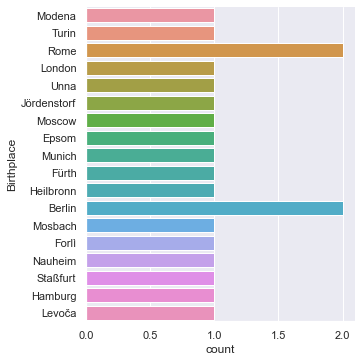

In [62]:

#plot the counting 
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
my_graph = sns.catplot(y="Birthplace", kind= "count", data= df) #two historians born in rome, 2 in berlin

see the map in the web

In [63]:
#CITIZENSHIP
import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()
world = dict()

# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')

unique_countries = set()
for s,p,o in g.triples(( None, wdt.P27, None)):   # wikidata = P27: citizenship
    for s1,p1,o1 in g.triples(( o, RDFS.label, None)):  
        unique_countries.add(o1.strip())
for country in unique_countries:
    print(country)
    
unique_historians = set()       #set di tutti gli arthistorian che sono creator di una collezione
for s,p,o in g.triples((None, wdt.P170, None)):
    for s1,p1,o1 in g.triples((o, RDFS.label, None)): #se metto s viene la lista delle collezioni
        unique_historians.add(o1.strip())
for historian in unique_historians:
    #print(historian)    
    
    query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/> 
    SELECT DISTINCT (COUNT(?individual) AS ?ind) ?country ?name
    WHERE {
        VALUES ?class {<http://www.wikidata.org/entity/Q5>}
        VALUES ?property{<http://www.wikidata.org/prop/direct/P27>} 
        ?individual rdf:type ?class ; 
                    ?property ?country .
        ?country rdfs:label ?name
    }
    GROUP BY ?name ?country
    """) #property P:27 to identify the citizenship of the entity historian (q5), from wikidata

with open('citizenship_count.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',')
    csv_writer.writerow(['Citizenship', 'Count'])
    for row in query_result:
        csv_writer.writerow([row.name.strip(), row.ind]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('citizenship_count.csv', encoding = 'Latin-1')
# print the first 5 rows
data.head(30)

Italy
Hungary
Germany
Russia
United States of America
England


Citizenship  Count
0                      Italy      6
1                      Italy      6
2                    Germany     12
3                    Germany     12
4   United States of America      2
5                    Germany     12
6                      Italy      6
7                    Germany     12
8                    Germany     12
9                    Germany     12
10                   Germany     12
11                   Germany     12
12                     Italy      6
13  United States of America      2
14                   Germany     12
15                   England      2
16  United States of America      2
17                   Germany     12
18                   Germany     12
19  United States of America      2
20                   Germany     12
21                   England      2
22                     Italy      6
23                    Russia      1
24                     Italy      6
25                     Italy      6
26  United States of America      2
27                     Italy      6
28                     Italy      6
29                     Italy      6

In [64]:
import pandas_profiling as pp
pp.ProfileReport(data.drop_duplicates('Citizenship', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

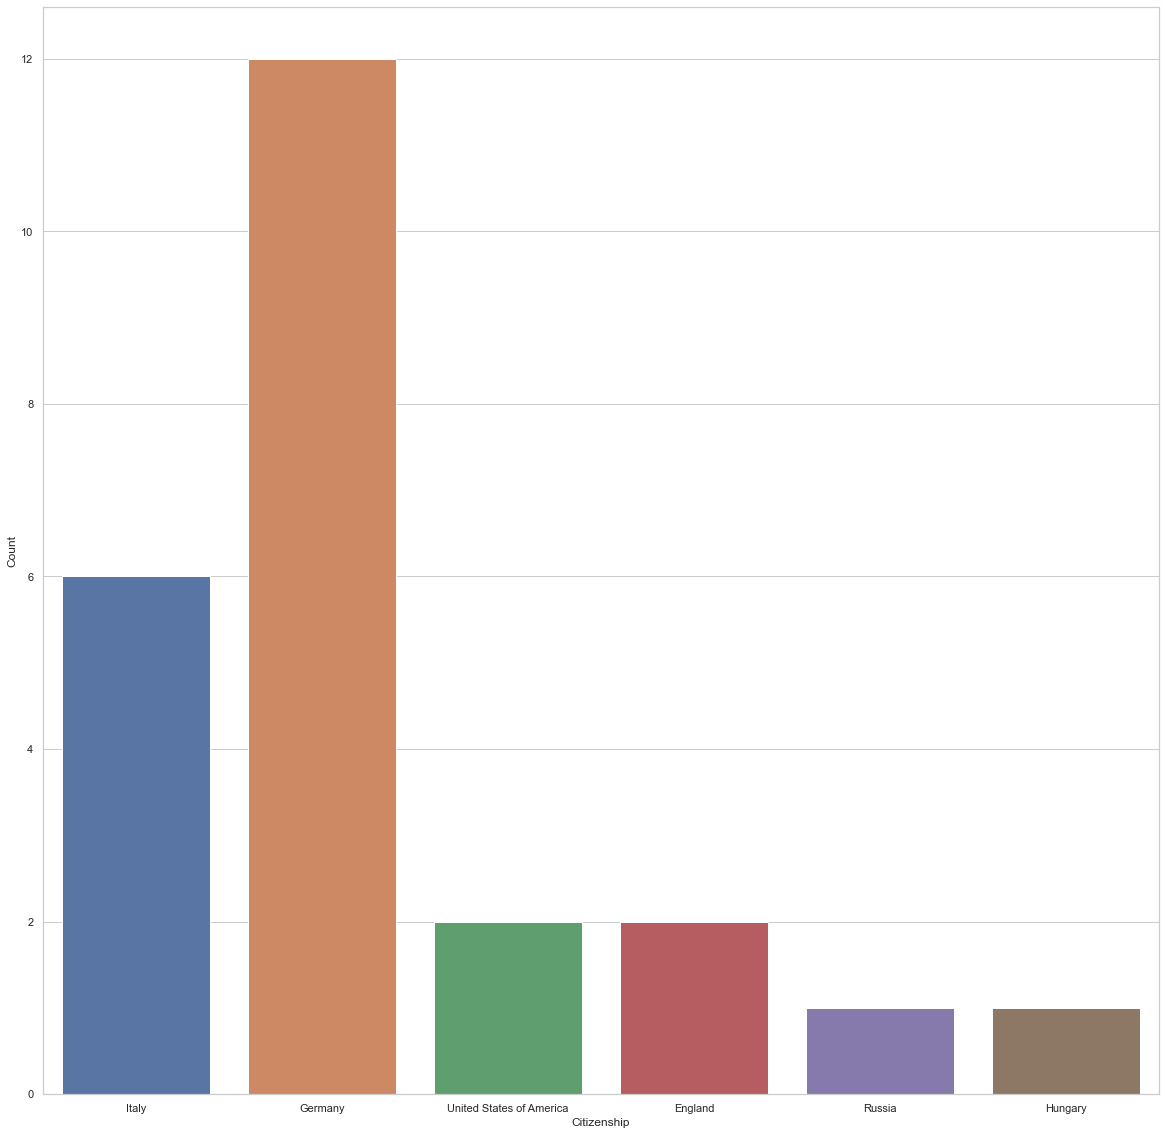

In [65]:
#my_graph = sns.catplot(y="Citizenship", kind = "count", data= df.drop_duplicates('Count', keep= 'last'))
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Citizenship", y="Count", data=data) #plot the distribution:citizenships of the historians

THERE ARE: 12 HISTORIANS FROM GERMANY, 6 FROM ITALY, 1 FROM HUNGARY, 1 FROM RUSSIA, 2 FROM ENGLAND AND 2 FROM U.S.A

In [66]:
#TO VERIFY IF THE COUNT IS CORRECT

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()
world_2 = dict()

# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')    
    
query_result_2 = g.query("""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/> 
SELECT DISTINCT ?individual ?label ?country ?name 
WHERE {
    VALUES ?class {<http://www.wikidata.org/entity/Q5>}
    VALUES ?property{<http://www.wikidata.org/prop/direct/P27>}
    ?individual rdf:type ?class ;
                rdfs:label ?label;
                ?property ?country .
    ?country rdfs:label ?name .
}
GROUP BY ?individual ?label ?country ?name 
""")

for query_res in query_result_2:
    for query in query_res:
        world_2.update({str(query_res["name"]):str(query_res["label"])})
print(world_2)   #create a dictionary with the art historian and the given country of citizenship

{'               Germany': '  Richard Krautheimer', '                    Germany': '  Richard Krautheimer', '           Italy': '   Federico Zeri', '  Germany': '         Ernst Kitzinger', ' Germany': 'Ernst Kitzinger', '                      Italy': 'Luisa Vertova', ' Italy': '              Federico Zeri', '         Germany': '  Richard Krautheimer', '      Italy': 'Eugenio Battisti', 'Germany': '       Otto Lehmann-Brockhaus', '             Germany': 'Aby Warburg', '     Germany': 'Aby Warburg', '           United States of America': '                           Everett Fahy', '      Germany': 'Richard Krautheimer', '               Italy': '              Federico Zeri', '                  Germany': 'Wolfgang Lotz', '                        Italy': 'Luisa Vertova', '              England': 'John Pope-Hennessy', '                 Germany': 'Richard Krautheimer', 'United States of America': '                           Everett Fahy', '       Italy': 'Federico Zeri', '                Unite

In [67]:
import csv
import rdflib

with open('dict_city.csv', 'w') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',')
    csv_writer.writerow(['Country', 'Historian'])
    for row in query_result_2:
        csv_writer.writerow([row.name.strip(), row.label.strip(),])
        
        
import pandas as pd
data = pd.read_csv('dict_city.csv', encoding = 'Latin-1')
# print the first 5 rows
data.head(30)

Country               Historian
0                    Germany         Ernst Kitzinger
1                    Germany       Ulrich Middeldorf
2                      Italy           Luisa Vertova
3                    Germany  Otto Lehmann-Brockhaus
4                    Germany         Ernst Steinmann
5                    Germany         Ernst Steinmann
6                      Italy        Eugenio Battisti
7                      Italy           Federico Zeri
8                    Germany         Ernst Steinmann
9                    Germany         Ernst Kitzinger
10                   Germany       Ulrich Middeldorf
11                   Germany       Ulrich Middeldorf
12                     Italy           Luisa Vertova
13                   Germany     Richard Krautheimer
14                   Germany         Ernst Steinmann
15                   Germany           Wolfgang Lotz
16  United States of America          Julius S. Held
17                   Germany         Ernst Steinmann
18                     Italy           Federico Zeri
19                   Germany             Aby Warburg
20                   Germany     Richard Krautheimer
21                   Germany             Werner Cohn
22                     Italy           Luigi Salerno
23                   Germany         Ernst Kitzinger
24                   Germany  Otto Lehmann-Brockhaus
25                     Italy           Federico Zeri
26                   Germany         Ernst Kitzinger
27                   Germany     Richard Krautheimer
28                   Germany           Gustav Ludwig
29                   Germany         Ernst Steinmann

In [68]:
import pandas_profiling as pp
pp.ProfileReport(data.drop_duplicates('Historian', keep= 'last'))
pp.ProfileReport(data.drop_duplicates('Country', keep= 'last')) #profile the veryfied file

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
#clean the file dict_city, drop duplicates
import pandas as pd
file_name = "dict_city.csv"
file_name_output = "dict_city_without_dupes.csv"
dupes = set()
df = pd.read_csv(file_name, sep=";", engine = "python", encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')



# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=";", encoding = "utf8")

In [70]:
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
#we create a matrice to plot our data from dict city
with open('dict_city_without_dupes.csv', encoding="utf8") as csvfile:
    historians = [] 
    countries = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) # create the list of unique historians
        if row[1] not in countries:
            countries.append(row[1]) # create the list of unique countries
    print(historians)
    print(countries)
    countries.sort()
    histo_zeros_matrix = np.array(np.zeros(( len(countries), len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): # loop over periods and their index position  
        for j, country in enumerate(countries):
            with open('dict_city_without_dupes.csv', encoding="utf-8") as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == country and row[0] == histo:
                        histo_zeros_matrix[j][i] = int(histo_zeros_matrix[j][i])+1
    
    histo_zeros_matrix
    
# put everything together
data["historians"] = historians
for i, country in enumerate(countries):
    data[country] = list(histo_zeros_matrix[i])
print(data) 

['Germany', 'Italy', 'United States of America', 'England', 'Russia', 'Hungary']
['Ernst Kitzinger', 'Ulrich Middeldorf', 'Luisa Vertova', 'Otto Lehmann-Brockhaus', 'Ernst Steinmann', 'Eugenio Battisti', 'Federico Zeri', 'Richard Krautheimer', 'Wolfgang Lotz', 'Julius S. Held', 'Aby Warburg', 'Werner Cohn', 'Luigi Salerno', 'Gustav Ludwig', 'Ellis Waterhouse', 'Adolfo Venturi', 'Julian Kliemann', 'Stefano Tumidei', 'John Pope-Hennessy', 'Everett Fahy', 'Kurt Badt', 'Fritz Heinemann', 'Leo Steinberg', 'Kornél Fabriczy']
{'historians': ['Germany', 'Italy', 'United States of America', 'England', 'Russia', 'Hungary'], 'Aby Warburg': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Adolfo Venturi': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Ellis Waterhouse': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 'Ernst Kitzinger': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Ernst Steinmann': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Eugenio Battisti': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Everett Fahy': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'Federico Zeri': [0.0, 1.0,

In [71]:

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

output_file("bar_nested_colormapped_historian_citizenship.html") #outputfile

countries = ['Germany', 'Italy', 'United States of America', 'England', 'Hungary', 'Russia']
historians = ['Werner Cohn', 'Ulrich Middeldorf', 'Gustav Ludwig', 'Federico Zeri', 'Wolfgang Lotz', 'Fritz Heinemann', 'Everett Fahy', 'Adolfo Venturi', 'Luigi Salerno', 'Ernst Kitzinger', 'Richard Krautheimer', 'Kurt Badt', 'Aby Warburg', 'Otto Lehmann-Brockhaus', 'John Pope-Hennessy', 'Stefano Tumidei', 'Luisa Vertova', 'Ernst Steinmann', 'KornÃ©l Fabriczy', 'Julius S. Held', 'Leo Steinberg', 'Eugenio Battisti', 'Julian Kliemann', 'Ellis Waterhouse']

data = {'historians': ['Germany', 'Italy', 'United States of America', 'England', 'Hungary', 'Russia'], 'Aby Warburg': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Adolfo Venturi': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Ellis Waterhouse': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 'Ernst Kitzinger': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Ernst Steinmann': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Eugenio Battisti': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Everett Fahy': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'Federico Zeri': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Fritz Heinemann': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Gustav Ludwig': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'John Pope-Hennessy': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 'Julian Kliemann': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Julius S. Held': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'KornÃ©l Fabriczy': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], 'Kurt Badt': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Leo Steinberg': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'Luigi Salerno': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Luisa Vertova': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Otto Lehmann-Brockhaus': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Richard Krautheimer': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Stefano Tumidei': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Ulrich Middeldorf': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Werner Cohn': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Wolfgang Lotz': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]


# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (country, historian) for country in countries for historian in historians ]
counts = sum(zip(data['Werner Cohn'], data['Ulrich Middeldorf'], data['Gustav Ludwig'],
                 data['Federico Zeri'], data['Wolfgang Lotz'], data['Fritz Heinemann'], 
                 data['Everett Fahy'],data['Adolfo Venturi'],data['Luigi Salerno'],
                 data['Ernst Kitzinger'],data['Richard Krautheimer'],data['Kurt Badt'],
                 data['Aby Warburg'],data['Otto Lehmann-Brockhaus'],
                 data['John Pope-Hennessy'], data['Stefano Tumidei'], data['Luisa Vertova'], data['Ernst Steinmann'], 
                 data['KornÃ©l Fabriczy'], data['Julius S. Held'], data['Leo Steinberg'], 
                 data['Eugenio Battisti'], data['Julian Kliemann'], data['Ellis Waterhouse']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=650, width=1500, title="Historians' Countries of Citizenship",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=historians, start=1, end=2,))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.55
#p.xaxis.axis_label= 'Kunsthistorisches Institut in Florenz'
p.xgrid.grid_line_color = None


show(p)
#this is a distributional barplot: the country of citizenship of each art historian 
#this is not so user friendly

see the distribution of the keepers (institutes) in which the historians stored their collections

In [84]:
#cities and countries of the keepers
import rdflib
import csv
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import pprint


wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")
#we do not need to use sparqlwrapper wikidata endpoint!

# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')

query_keepers = g.query('''
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wdp: <http://www.wikidata.org/wiki/Property:>
PREFIX art: <https://w3id.org/artchives/>
PREFIX wd: <http://www.wikidata.org/entity/>
SELECT DISTINCT  ?nameKeeper ?nameCountry ?nameCity
WHERE {
 ?keeper a wd:Q31855 ; 
         rdfs:label ?nameKeeper ;
         wdt:P131 ?city;
         wdt:P17 ?country .
 ?country rdfs:label ?nameCountry .
 ?city rdfs:label ?nameCity .
}
GROUP BY  ?nameKeeper ?nameCountry ?nameCity
''') 

with open('keepers_city_b.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    csv_writer.writerow(["nameKeeper","nameCountry", "nameCity"])
    # access the rows of the query results
    for nameKeeper, nameCountry, nameCity in query_keepers:
        # write in the csv
        csv_writer.writerow([nameKeeper.strip(), nameCountry.strip(), nameCity.strip()])        

        
import pandas as pd
data = pd.read_csv('keepers_city_b.csv', encoding = 'Latin-1')
# print the first 5 rows
data.head(20)

nameKeeper nameCountry  nameCity
0   Kunsthistorisches Institut in Florenz       Italy  Florence
1   Kunsthistorisches Institut in Florenz       Italy  Florence
2   Kunsthistorisches Institut in Florenz       Italy  Florence
3   Kunsthistorisches Institut in Florenz       Italy  Florence
4   Kunsthistorisches Institut in Florenz       Italy  Florence
5   Kunsthistorisches Institut in Florenz       Italy  Florence
6   Kunsthistorisches Institut in Florenz       Italy  Florence
7   Kunsthistorisches Institut in Florenz       Italy  Florence
8   Kunsthistorisches Institut in Florenz       Italy  Florence
9   Kunsthistorisches Institut in Florenz       Italy  Florence
10  Kunsthistorisches Institut in Florenz       Italy  Florence
11  Kunsthistorisches Institut in Florenz       Italy  Florence
12  Kunsthistorisches Institut in Florenz       Italy  Florence
13  Kunsthistorisches Institut in Florenz       Italy  Florence
14  Kunsthistorisches Institut in Florenz       Italy  Florence
15  Kunsthistorisches Institut in Florenz       Italy  Florence
16  Kunsthistorisches Institut in Florenz       Italy  Florence
17  Kunsthistorisches Institut in Florenz       Italy  Florence
18  Kunsthistorisches Institut in Florenz       Italy  Florence
19  Kunsthistorisches Institut in Florenz       Italy  Florence

In [73]:
import pandas as pd
file_name = "keepers_city_b.csv"
file_name_output = "kep_cit_new_without_dupes.csv" #create file without duplicates

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')

# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")

In [77]:

df = pd.read_csv("kep_cit_new_without_dupes.csv", delimiter=',', encoding = "utf8")
df.columns = df.columns.str.replace(' ', '')


df = df.drop([5], axis=0) #there are wrong data: the kunsthistorisches institut is in Italy, not in Germany

df.head(40)

nameKeeper  \
0                           Fondazione Federico Zeri   
1  Bibliotheca Hertziana %u2013 Max Planck Instit...   
2                           Scuola Normale Superiore   
3                           Getty Research Institute   
4              Kunsthistorisches Institut in Florenz   

                nameCountry     nameCity  
0                     Italy      Bologna  
1                     Italy         Rome  
2                     Italy         Pisa  
3  United States of America  Los Angeles  
4                     Italy     Florence

In [78]:
df.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'}) 
#style the dataframe. 

bologna, rome, pisa, los angeles and florence are the cities in which the institutes are located!

In [79]:
import pandas as pd
file_name = "kep_cit_new_without_dupes.csv"
file_name_output = "countries_with_keepers_final.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')

df = df.drop("nameCity", axis=1)
df = df.drop([5], axis=0)
# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8") #drop the cities to count the the countries

In [80]:

df = pd.read_csv("countries_with_keepers_final.csv", delimiter=',', encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')
    #prova con writerow, o creare dataFrame con pandasdata.drop_duplicates('nameKeeper', keep= 'last'))

#df.head(30)
#df =df.set_index("Birthplace")
#df = df.drop("Forl�", axis=0)
#df = df.drop([3], axis=0)

df.head(40)

nameKeeper               nameCountry
0                           Fondazione Federico Zeri                     Italy
1  Bibliotheca Hertziana %u2013 Max Planck Instit...                     Italy
2                           Scuola Normale Superiore                     Italy
3                           Getty Research Institute  United States of America
4              Kunsthistorisches Institut in Florenz                     Italy

In [81]:
import pandas_profiling as pp
pp.ProfileReport(data.drop_duplicates('nameKeeper', keep= 'last'))

pp.ProfileReport(data.drop_duplicates('nameCountry', keep= 'last')) #profile the countries of the keepers

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

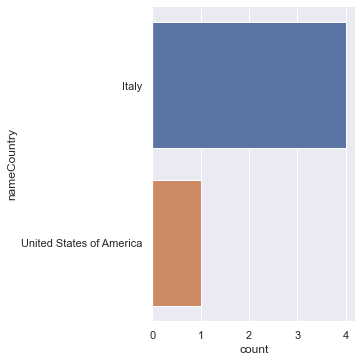

In [82]:
#plot the counting: keepers per country
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
my_graph = sns.catplot(y="nameCountry", kind= "count", data= df)

there are 4 institutes in italy, and one in u.s.a

In [86]:
#MATRIX FOR THE PIE CHART
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('countries_with_keepers_final.csv') as csvfile:
    country = [] 
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[1] not in country:
            country.append(row[1]) # create the list of unique countries
       
    print(country)
    keepers_zeros_matrix = np.array(np.zeros((len(country) ))) # rows, columns
    
    for i, con in enumerate(country): # loop over countries and their index position  
            with open('countries_with_keepers_final.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == con:  
                        keepers_zeros_matrix[i] = int(keepers_zeros_matrix[i])+1
    
    keepers_zeros_matrix
    

print(keepers_zeros_matrix)

['Italy', 'United States of America']
[4. 1.]


In [95]:
#PIE CHART: NUMBER OF INSTITUTES PER COUNTRIES
from math import pi

import pandas as pd

from bokeh.io import output_file, show, curdoc
#from bokeh.palettes import 
from bokeh.plotting import figure
from bokeh.transform import cumsum
import random

output_file("pie.html")
curdoc().theme = 'dark_minimal'

x ={ 'Italy': 4, 
      'United States of America': 1
 }

data = pd.Series(x).reset_index(name='value').rename(columns={'index':'nameCountry'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
number_of_colors = 2 # pick random colors for the countries
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
data['color'] = palette

p = figure(plot_height=700, title="Number of Institutes per Countries", toolbar_location=None,
           tools="hover", tooltips="@nameCountry: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='nameCountry', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

now, we query and plot the relation between collections and historians

In [48]:
#relate collections to historians

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')


    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Collection ?Historian
    WHERE {
        ?collect wdt:P170 ?artHistorian .
        ?collect rdfs:label ?Collection .
        ?artHistorian rdfs:label ?Historian . 
    }
    GROUP BY ?Collection ?Historian
    """)

with open('coll_histor.csv', 'w') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Collection', 'Historian'])
    for Collection, Historian in query_result:
        csv_writer.writerow([Collection.strip(), Historian.strip()]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('coll_histor.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)

Collection               Historian
0                        Nachlass Richard Krautheimer     Richard Krautheimer
1                        Nachlass Richard Krautheimer     Richard Krautheimer
2                        Nachlass Richard Krautheimer     Richard Krautheimer
3                   Ernst Kitzinger papers, 1931-1995         Ernst Kitzinger
4                   Ernst Kitzinger papers, 1931-1995         Ernst Kitzinger
5                   Ernst Kitzinger papers, 1931-1995         Ernst Kitzinger
6                           John Pope-Hennessy papers      John Pope-Hennessy
7                           John Pope-Hennessy papers      John Pope-Hennessy
8                           John Pope-Hennessy papers      John Pope-Hennessy
9                 Battisti Eugenio (complex of fonds)        Eugenio Battisti
10                         Nachlass Ulrich Middeldorf       Ulrich Middeldorf
11                         Nachlass Ulrich Middeldorf       Ulrich Middeldorf
12                             Nachlass Wolfgang Lotz           Wolfgang Lotz
13                             Nachlass Wolfgang Lotz           Wolfgang Lotz
14                               Nachlass Werner Cohn             Werner Cohn
15                                      Fototeca Zeri           Federico Zeri
16                                      Fototeca Zeri           Federico Zeri
17                                      Fototeca Zeri           Federico Zeri
18                                      Fototeca Zeri           Federico Zeri
19                                  Fondo Aby Warburg             Aby Warburg
20                      Luigi Salerno research papers           Luigi Salerno
21                    Nachlass Cornelius von Fabriczy         Kornél Fabriczy
22  Nachlass Fritz Heinemann, Notizen zur venezian...         Fritz Heinemann
23                    Nachlass Otto Lehmann-Brockhaus  Otto Lehmann-Brockhaus
24                    Nachlass Otto Lehmann-Brockhaus  Otto Lehmann-Brockhaus
25                    Nachlass Otto Lehmann-Brockhaus  Otto Lehmann-Brockhaus
26                              Julius S. Held papers          Julius S. Held
27                              Julius S. Held papers          Julius S. Held
28                           Fototeca Julian Kliemann         Julian Kliemann
29                                      Fototeca Fahy            Everett Fahy

In [49]:
import pandas as pd
file_name = "coll_histor.csv"
file_name_output = "coll_histor_no_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')
#we delete the duplicates from the file

# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")

In [50]:
df = pd.read_csv("coll_histor_no_dupes.csv", delimiter=',', encoding = "utf8")
df.columns = df.columns.str.replace(' ', '')
    #prova con writerow, o creare dataFrame con pandasdata.drop_duplicates('nameKeeper', keep= 'last'))
df.drop_duplicates("Collection", keep= "last")
df.drop_duplicates("Historian", keep="last")
#df.head(30)
#df =df.set_index("Birthplace")
#df = df.drop("Forl�", axis=0)


df.head(40)

Collection               Historian
0                        Nachlass Richard Krautheimer     Richard Krautheimer
1                   Ernst Kitzinger papers, 1931-1995         Ernst Kitzinger
2                           John Pope-Hennessy papers      John Pope-Hennessy
3                 Battisti Eugenio (complex of fonds)        Eugenio Battisti
4                          Nachlass Ulrich Middeldorf       Ulrich Middeldorf
5                              Nachlass Wolfgang Lotz           Wolfgang Lotz
6                                Nachlass Werner Cohn             Werner Cohn
7                                       Fototeca Zeri           Federico Zeri
8                                   Fondo Aby Warburg             Aby Warburg
9                       Luigi Salerno research papers           Luigi Salerno
10                    Nachlass Cornelius von Fabriczy         Kornél Fabriczy
11  Nachlass Fritz Heinemann, Notizen zur venezian...         Fritz Heinemann
12                    Nachlass Otto Lehmann-Brockhaus  Otto Lehmann-Brockhaus
13                              Julius S. Held papers          Julius S. Held
14                           Fototeca Julian Kliemann         Julian Kliemann
15                                      Fototeca Fahy            Everett Fahy
16   Ellis K. Waterhouse notebooks and research files        Ellis Waterhouse
17                           Fototeca Stefano Tumidei         Stefano Tumidei
18                           Ulrich Middledorf papers       Ulrich Middeldorf
19                             Archivio Luisa Vertova           Luisa Vertova
20                          Gustav Ludwig-Vermächtnis           Gustav Ludwig
21                      Leo Steinberg research papers           Leo Steinberg
22                  Venturi Adolfo (complex of fonds)          Adolfo Venturi
23                           Nachlass Ernst Steinmann         Ernst Steinmann
24                                 Nachlass Kurt Badt               Kurt Badt

In [51]:
df.style.set_properties(**{'background-color': 'black',
                           'color': 'lawngreen',
                           'border-color': 'white'}) #we style the dataframe: each historian has a corresponding collection, 1-to-1

new query: relate periods and collections

In [96]:
#RELATE THE HISTORIANS TO THE PERIODS TREATED IN THEIR COLLECTIONS

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')


    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Historian ?Period
    WHERE {
        ?collect wdt:P170 ?artHistorian ;
                    rdfs:label ?Collection ;
                    art:hasSubjectPeriod ?perio .
        ?perio rdfs:label ?Period .
        ?artHistorian rdfs:label ?Historian . 
    }
    GROUP BY ?Historian ?Period
    """)

with open('historian_periods.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Historian', 'Period'])
    for row in query_result:
        csv_writer.writerow([row.Historian.strip(), row.Period.lower().strip()]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('historian_periods.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)


Historian        Period
0    Gustav Ludwig  15th century
1    Gustav Ludwig  15th century
2    Gustav Ludwig  15th century
3    Gustav Ludwig  15th century
4    Gustav Ludwig  15th century
5    Gustav Ludwig  15th century
6    Gustav Ludwig  15th century
7    Gustav Ludwig  16th century
8    Gustav Ludwig  16th century
9    Gustav Ludwig  16th century
10   Gustav Ludwig  16th century
11   Gustav Ludwig  16th century
12   Gustav Ludwig  16th century
13   Gustav Ludwig  16th century
14   Gustav Ludwig  16th century
15   Gustav Ludwig  16th century
16  Julius S. Held  16th century
17  Julius S. Held  16th century
18  Julius S. Held  16th century
19  Julius S. Held  16th century
20  Julius S. Held  16th century
21  Julius S. Held  16th century
22  Julius S. Held  16th century
23  Julius S. Held  16th century
24  Julius S. Held  16th century
25  Julius S. Held  16th century
26  Julius S. Held  16th century
27  Julius S. Held  16th century
28  Julius S. Held  16th century
29  Julius S. Held  16th century

In [97]:
import pandas as pd
file_name = "historian_periods.csv"
file_name_output = "historian_periods_without_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')


# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")

In [98]:
df = pd.read_csv("historian_periods_without_dupes.csv", delimiter=',', encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')
    #prova con writerow, o creare dataFrame con pandasdata.drop_duplicates('nameKeeper', keep= 'last'))
df.drop_duplicates('Historian', keep= 'last')
df.drop_duplicates('Period', keep= 'last')

#df.head(30)
#df =df.set_index("Birthplace")
#df = df.drop("Forl�", axis=0)
#df = df.drop([13], axis=0)
df.head(40)

Historian                                Period
0        Gustav Ludwig                          15th century
1        Gustav Ludwig                          16th century
2       Julius S. Held                          16th century
3       Julius S. Held                          17th century
4      Fritz Heinemann                          15th century
5      Fritz Heinemann                             mannerism
6      Fritz Heinemann                          16th century
7      Fritz Heinemann                          17th century
8      Fritz Heinemann                               baroque
9      Fritz Heinemann                           renaissance
10  John Pope-Hennessy                          15th century
11  John Pope-Hennessy                           renaissance
12     Ernst Kitzinger  early christian art and architecture
13     Ernst Kitzinger                           middle ages
14     Ernst Kitzinger                         byzantine art
15     Julian Kliemann                               baroque
16     Julian Kliemann                           renaissance
17     Julian Kliemann                          15th century
18     Julian Kliemann                             mannerism
19     Julian Kliemann                          16th century
20     Julian Kliemann                          17th century
21     Ernst Steinmann                           renaissance
22       Leo Steinberg                            modern art
23       Leo Steinberg                           renaissance
24    Ellis Waterhouse                               baroque
25    Ellis Waterhouse                             mannerism
26         Werner Cohn                           renaissance
27         Werner Cohn                           middle ages
28        Everett Fahy                          15th century
29        Everett Fahy                          14th century
30        Everett Fahy                          16th century
31        Everett Fahy                           renaissance
32   Ulrich Middeldorf                           renaissance
33       Wolfgang Lotz                           renaissance
34       Wolfgang Lotz                          16th century
35       Wolfgang Lotz                          17th century
36       Wolfgang Lotz                               baroque
37       Luisa Vertova                          19th century
38       Luisa Vertova                          16th century
39       Luisa Vertova                          15th century

In [99]:
import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Historian', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Period', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

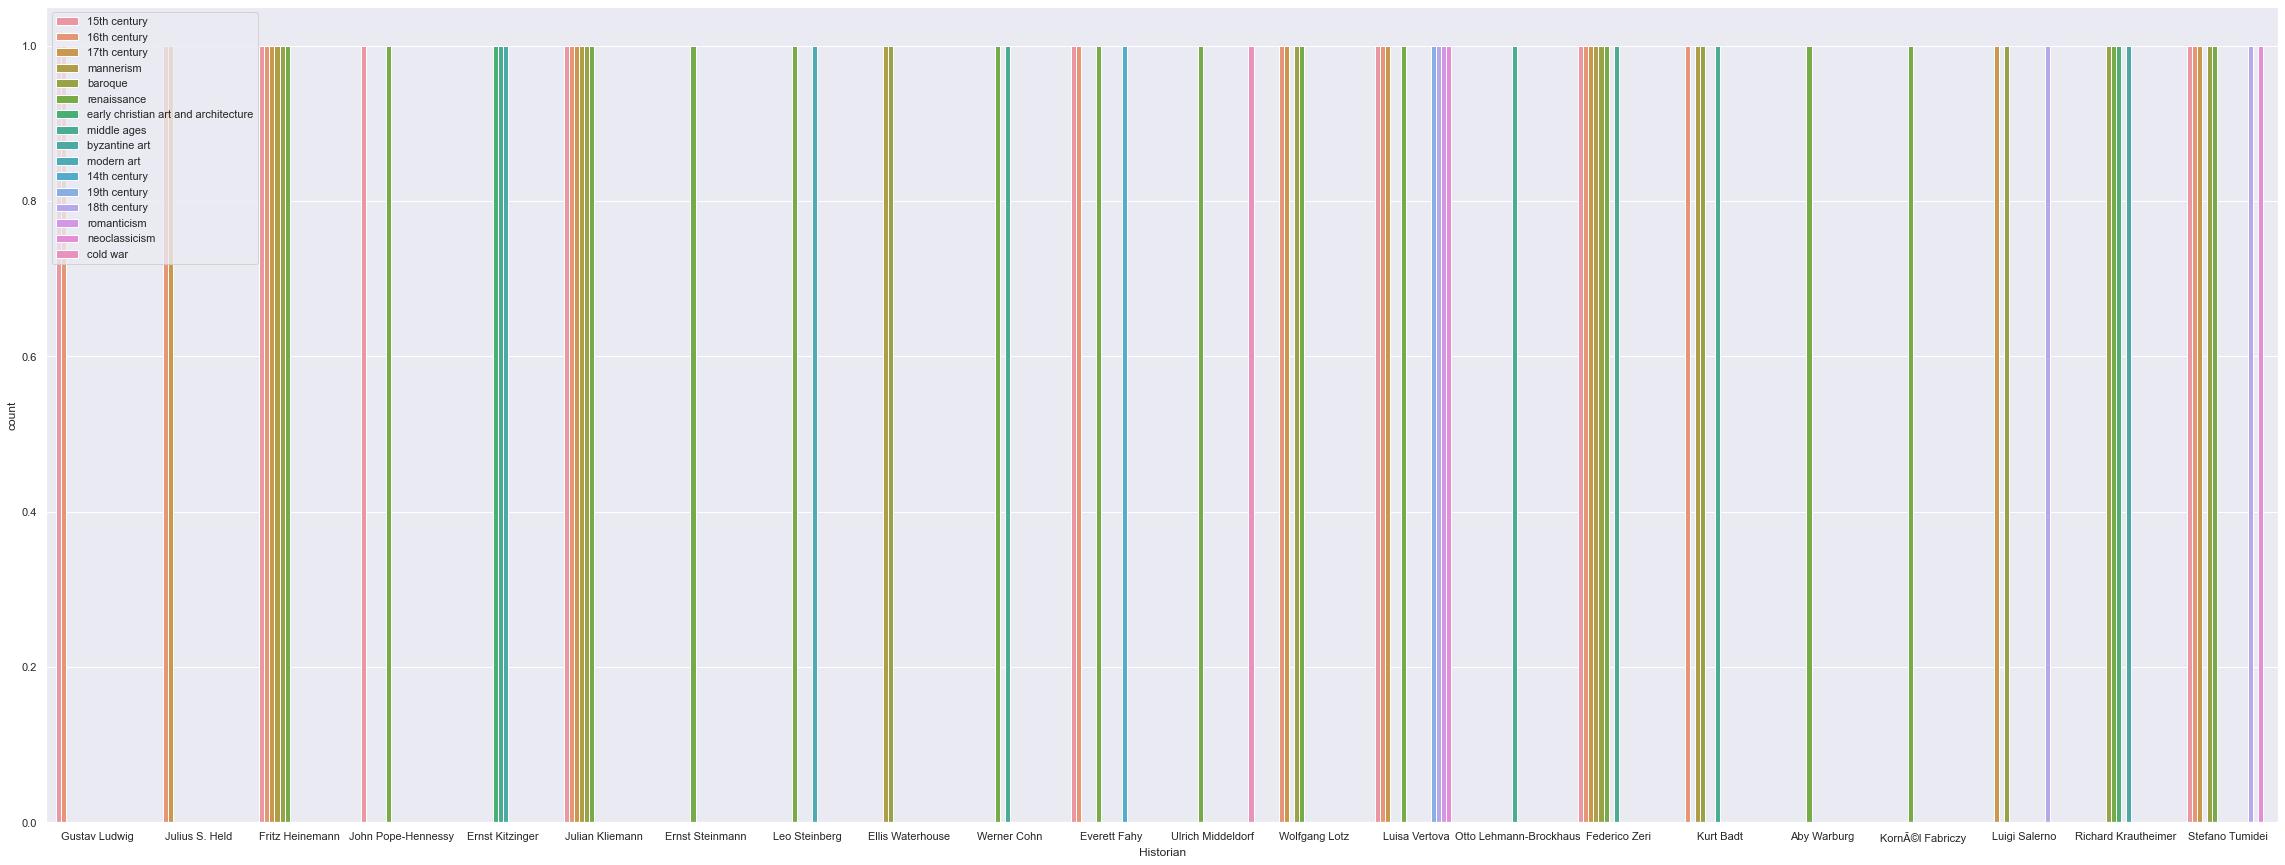

In [100]:
#PERIODS STUDIED BY EACH HISTORIAN
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (40, 15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Historian", hue="Period", data=df)
plt.legend(loc='upper left')


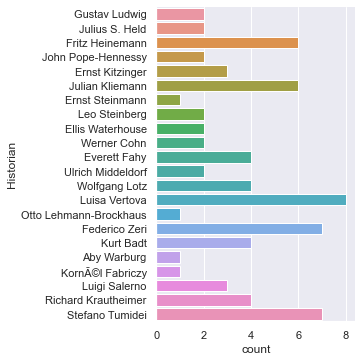

In [101]:
#plot the COUNT OF PERIODS STUDIED BY EACH HISTORIAN
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
ax = sns.catplot(y="Historian", kind= "count", data= df)

In [105]:
#PIE CHART: NUMBER OF PERIODS STUDIED BY EACH HISTORIAN
from math import pi

import pandas as pd

from bokeh.io import output_file, show, curdoc
#from bokeh.palettes import 
from bokeh.plotting import figure
from bokeh.transform import cumsum
import random

output_file("pie_historian_periods.html")
curdoc().theme = 'dark_minimal'

x ={
     'Ernst Kitzinger':3,
     'Gustav Ludwig':2,
     'Kornél Fabriczy':4,
     'Richard Krautheimer':4, 
     'Ellis Waterhouse':2, 
     'Everett Fahy':4, 
     'Kurt Badt':4, 
     'Luisa Vertova':8, 
     'Luigi Salerno':3, 
     'Julius S. Held':2, 
     'John Pope-Hennessy':2, 
     'Julian Kliemann':6, 
     'Aby Warburg':1, 
     'Werner Cohn':2, 
     'Leo Steinberg':2, 
     'Ernst Steinmann':1, 
     'Stefano Tumidei':7, 
     'Ulrich Middeldorf':2, 
     'Fritz Heinemann':6, 
     'Wolfgang Lotz':4, 
     'Otto Lehmann-Brockhaus':1, 
     'Federico Zeri':7
 }


data = pd.Series(x).reset_index(name='value').rename(columns={'index':'Historians'})
data['angle'] = data['value']/data['value'].sum() * 2*pi
number_of_colors = 22 # pick random colors for the historians
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
data['color'] = palette

p = figure(plot_height=700, title="Number of Collections per Historian", toolbar_location=None,
           tools="hover", tooltips="@Historians: @value", x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='Historians', source=data)

p.axis.axis_label=None
p.axis.visible=False
p.grid.grid_line_color = None

show(p)

In [102]:
#MATRIX FOR THE PIE CHART
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('historian_periods_without_dupes.csv') as csvfile:
    historians = [] 
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) # create the list of unique historians
       
    print(historians)
    periods_zeros_matrix = np.array(np.zeros((len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): # loop over historians and their index position  
            with open('historian_periods_without_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[0] == histo:  
                        periods_zeros_matrix[i] = int(periods_zeros_matrix[i])+1
    
    periods_zeros_matrix
    

print(periods_zeros_matrix)

['Gustav Ludwig', 'Julius S. Held', 'Fritz Heinemann', 'John Pope-Hennessy', 'Ernst Kitzinger', 'Julian Kliemann', 'Ernst Steinmann', 'Leo Steinberg', 'Ellis Waterhouse', 'Werner Cohn', 'Everett Fahy', 'Ulrich Middeldorf', 'Wolfgang Lotz', 'Luisa Vertova', 'Otto Lehmann-Brockhaus', 'Federico Zeri', 'Kurt Badt', 'Aby Warburg', 'KornÃ©l Fabriczy', 'Luigi Salerno', 'Richard Krautheimer', 'Stefano Tumidei']
[2. 2. 6. 2. 3. 6. 1. 2. 2. 2. 4. 2. 4. 8. 1. 7. 4. 1. 1. 3. 4. 7.]


In [106]:
#historian*period matrix 
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('historian_periods_without_dupes.csv', encoding="utf8") as csvfile:
    historians = [] 
    periods = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) # create the list of unique periods
        if row[1] not in periods:
            periods.append(row[1]) # create the list of unique periods
    print(historians)
    print(periods)
    periods.sort()
    periods_zeros_matrix = np.array(np.zeros(( len(periods), len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): # loop over periods and their index position  
        for j, period in enumerate(periods):
            with open('historian_periods_without_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == period and row[0] == histo:  
                        periods_zeros_matrix[j][i] = int(periods_zeros_matrix[j][i])+1
    
    periods_zeros_matrix
    
# put everything together
data["Historians"] = historians
for i, period in enumerate(periods):
    data[period] = list(periods_zeros_matrix[i])
print(data)

['Gustav Ludwig', 'Julius S. Held', 'Fritz Heinemann', 'John Pope-Hennessy', 'Ernst Kitzinger', 'Julian Kliemann', 'Ernst Steinmann', 'Leo Steinberg', 'Ellis Waterhouse', 'Werner Cohn', 'Everett Fahy', 'Ulrich Middeldorf', 'Wolfgang Lotz', 'Luisa Vertova', 'Otto Lehmann-Brockhaus', 'Federico Zeri', 'Kurt Badt', 'Aby Warburg', 'Kornél Fabriczy', 'Luigi Salerno', 'Richard Krautheimer', 'Stefano Tumidei']
['15th century', '16th century', '17th century', 'mannerism', 'baroque', 'renaissance', 'early christian art and architecture', 'middle ages', 'byzantine art', 'modern art', '14th century', '19th century', '18th century', 'romanticism', 'neoclassicism', 'cold war']
{'Historians': ['Gustav Ludwig', 'Julius S. Held', 'Fritz Heinemann', 'John Pope-Hennessy', 'Ernst Kitzinger', 'Julian Kliemann', 'Ernst Steinmann', 'Leo Steinberg', 'Ellis Waterhouse', 'Werner Cohn', 'Everett Fahy', 'Ulrich Middeldorf', 'Wolfgang Lotz', 'Luisa Vertova', 'Otto Lehmann-Brockhaus', 'Federico Zeri', 'Kurt Badt', 

In [107]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.layouts import row
import random
#black bar nested colormapped, not particularly clear
output_file("bar_nested_colormapped_period_histo.html")

historians = ['Gustav Ludwig', 'Fritz Heinemann', 'Werner Cohn', 'Ulrich Middeldorf', 'Ernst Steinmann', 'Leo Steinberg', 'Wolfgang Lotz', 'Otto Lehmann-Brockhaus', 'Kurt Badt', 'Julius S. Held', 'Aby Warburg', 'Ellis Waterhouse', 'Stefano Tumidei', 'John Pope-Hennessy', 'Kornél Fabriczy', 'Richard Krautheimer', 'Ernst Kitzinger', 'Julian Kliemann', 'Federico Zeri', 'Everett Fahy', 'Luigi Salerno', 'Luisa Vertova']
periods = ['byzantine art', 'middle ages', 'early christian art and architecture', '17th century', '16th century', 'baroque', 'renaissance', 'mannerism', '15th century', 'romanticism', '19th century', '18th century', 'neoclassicism', 'cold war', 'modern art', '14th century']
data = {'Historians': ['Ernst Steinmann', 'Julian Kliemann', 'Wolfgang Lotz', 'Richard Krautheimer', 'Luigi Salerno', 'Stefano Tumidei', 'Ulrich Middeldorf', 'Gustav Ludwig', 'John Pope-Hennessy', 'Luisa Vertova', 'Kurt Badt', 'Werner Cohn', 'Ernst Kitzinger', 'Ellis Waterhouse', 'Fritz Heinemann', 'Everett Fahy', 'Aby Warburg', 'KornÃ©l Fabriczy', 'Federico Zeri', 'Otto Lehmann-Brockhaus', 'Julius S. Held', 'Leo Steinberg'], '14th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '15th century': [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], '16th century': [0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], '17th century': [0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0], '18th century': [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '19th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'baroque': [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'byzantine art': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'cold war': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'early christian art and architecture': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'mannerism': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'middle ages': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0], 'modern art': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'neoclassicism': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'renaissance': [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0], 'romanticism': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

number_of_colors = 18 # pick random colors
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

x = [ (historian, period) for historian in historians for period in periods ]
counts = sum(zip(data['byzantine art'], data['middle ages'], data['early christian art and architecture'], data['17th century'], data['16th century'], data['baroque'], data['renaissance'], data['mannerism'], data['15th century'], data['romanticism'], data['19th century'], data['18th century'], data['neoclassicism'], data['cold war'], data['modern art'], data['14th century']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=650, width=4000, title="Period Counts by Historian",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=periods, start=1, end=2))

p.unapply_theme()
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.55
p.xgrid.grid_line_color = None
#p.xgrid=

show(row(p))



In [114]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import GnBu3, OrRd3
from bokeh.plotting import figure

output_file("bar_stacked_split.html")
#period studied by historian
historians = ['Gustav Ludwig', 'Fritz Heinemann', 'Werner Cohn', 'Ulrich Middeldorf', 'Ernst Steinmann', 'Leo Steinberg', 'Wolfgang Lotz', 'Otto Lehmann-Brockhaus', 'Kurt Badt', 'Julius S. Held', 'Aby Warburg', 'Ellis Waterhouse', 'Stefano Tumidei', 'John Pope-Hennessy', 'Kornél Fabriczy', 'Richard Krautheimer', 'Ernst Kitzinger', 'Julian Kliemann', 'Federico Zeri', 'Everett Fahy', 'Luigi Salerno', 'Luisa Vertova']
periods = ['byzantine art', 'middle ages', 'early christian art and architecture', '17th century', '16th century', 'baroque', 'renaissance', 'mannerism', '15th century', 'romanticism', '19th century', '18th century', 'neoclassicism', 'cold war', 'modern art', '14th century']

data = {'Historians': ['Ernst Kitzinger', 'Wolfgang Lotz', 'Federico Zeri', 'Otto Lehmann-Brockhaus', 'Luisa Vertova', 'Kurt Badt', 'Julius S. Held', 'Ulrich Middeldorf', 'Aby Warburg', 'Werner Cohn', 'Fritz Heinemann', 'Stefano Tumidei', 'Leo Steinberg', 'Kornél Fabriczy', 'Gustav Ludwig', 'Luigi Salerno', 'Everett Fahy', 'Richard Krautheimer', 'Julian Kliemann', 'Ellis Waterhouse', 'Ernst Steinmann', 'John Pope-Hennessy'], '14th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0], '15th century': [0.0, 0.0, 28.0, 0.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 7.0, 0.0, 0.0, 7.0, 0.0, 14.0, 0.0, 7.0, 0.0, 0.0, 21.0], '16th century': [0.0, 18.0, 36.0, 0.0, 9.0, 9.0, 18.0, 0.0, 0.0, 0.0, 9.0, 9.0, 0.0, 0.0, 9.0, 0.0, 18.0, 0.0, 9.0, 0.0, 0.0, 0.0], '17th century': [0.0, 14.0, 28.0, 0.0, 7.0, 0.0, 14.0, 0.0, 0.0, 0.0, 7.0, 7.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 7.0, 0.0, 0.0, 0.0], '18th century': [0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '19th century': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'baroque': [0.0, 22.0, 44.0, 0.0, 0.0, 11.0, 0.0, 0.0, 0.0, 0.0, 11.0, 11.0, 0.0, 0.0, 0.0, 11.0, 0.0, 33.0, 11.0, 11.0, 0.0, 0.0], 'byzantine art': [12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0], 'cold war': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'early christian art and architecture': [6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0], 'mannerism': [0.0, 0.0, 24.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 6.0, 0.0, 0.0], 'middle ages': [18.0, 0.0, 24.0, 18.0, 0.0, 6.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'modern art': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'neoclassicism': [0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'renaissance': [0.0, 22.0, 44.0, 0.0, 11.0, 0.0, 0.0, 22.0, 11.0, 11.0, 11.0, 11.0, 22.0, 11.0, 0.0, 0.0, 22.0, 33.0, 11.0, 0.0, 33.0, 33.0], 'romanticism': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

number_of_colors = 16 # pick random colors
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

p = figure(y_range=historians, plot_width=850, plot_height=750, x_range=(-18, 18), title="Periods treated in Historians' Collections",
           toolbar_location=None, tools="hover", tooltips="$name: @$name")

p.hbar_stack(periods, y='Historians', width=0, height=0.9, color=palette, source=ColumnDataSource(data),
             legend_label=["%s" % x for x in periods])

#p.hbar_stack(periods, y='historians', height=0.9, color=OrRd3, source=ColumnDataSource(imports),
 #            legend_label=["%s imports" % x for x in years])
p.unapply_theme()
p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "top_left"
p.axis.minor_tick_line_color = None
p.outline_line_color = None

show(p)

In [ ]:
new query: relate collections to keepers

In [28]:
#RELATE COLLECTIONS TO KEEPERS

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')


    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Collection ?Keeper
    WHERE {
         ?keep a wd:Q31855 ; 
                 rdfs:label ?Keeper .
        ?collect wdt:P170 ?artHistorian .
        ?collect rdfs:label ?Collection .
        ?artHistorian rdfs:label ?Historian . 
    }
    GROUP BY ?Collection ?Keeper
    """)

with open('collection_keeper.csv', 'w') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Collection', 'Keeper'])
    for Collection, Keeper in query_result:
        csv_writer.writerow([Collection.strip(), Keeper.strip()]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('collection_keeper.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)

Collection  \
0                        Nachlass Richard Krautheimer   
1   Nachlass Fritz Heinemann, Notizen zur venezian...   
2                   Venturi Adolfo (complex of fonds)   
3                               Julius S. Held papers   
4                           Gustav Ludwig-Vermächtnis   
5                       Luigi Salerno research papers   
6                     Nachlass Otto Lehmann-Brockhaus   
7                                       Fototeca Zeri   
8                          Nachlass Ulrich Middeldorf   
9                            Fototeca Julian Kliemann   
10   Ellis K. Waterhouse notebooks and research files   
11                             Archivio Luisa Vertova   
12                          John Pope-Hennessy papers   
13                                 Nachlass Kurt Badt   
14                               Nachlass Werner Cohn   
15                                  Fondo Aby Warburg   
16                    Nachlass Cornelius von Fabriczy   
17                      Leo Steinberg research papers   
18                  Ernst Kitzinger papers, 1931-1995   
19                                      Fototeca Fahy   
20                Battisti Eugenio (complex of fonds)   
21                             Nachlass Wolfgang Lotz   
22                           Nachlass Ernst Steinmann   
23                           Ulrich Middledorf papers   
24                           Fototeca Stefano Tumidei   
25                       Nachlass Richard Krautheimer   
26  Nachlass Fritz Heinemann, Notizen zur venezian...   
27                  Venturi Adolfo (complex of fonds)   
28                              Julius S. Held papers   
29                          Gustav Ludwig-Vermächtnis   

                      Keeper  
0   Getty Research Institute  
1   Getty Research Institute  
2   Getty Research Institute  
3   Getty Research Institute  
4   Getty Research Institute  
5   Getty Research Institute  
6   Getty Research Institute  
7   Getty Research Institute  
8   Getty Research Institute  
9   Getty Research Institute  
10  Getty Research Institute  
11  Getty Research Institute  
12  Getty Research Institute  
13  Getty Research Institute  
14  Getty Research Institute  
15  Getty Research Institute  
16  Getty Research Institute  
17  Getty Research Institute  
18  Getty Research Institute  
19  Getty Research Institute  
20  Getty Research Institute  
21  Getty Research Institute  
22  Getty Research Institute  
23  Getty Research Institute  
24  Getty Research Institute  
25  Getty Research Institute  
26  Getty Research Institute  
27  Getty Research Institute  
28  Getty Research Institute  
29  Getty Research Institute

In [29]:
import csv
import pandas as pd


with open("collection_keeper.csv") as csv_file:
    df = pd.read_csv(csv_file, delimiter=',', encoding = "latin-1")
print(df.head(20))

                                           Collection  \
0                        Nachlass Richard Krautheimer   
1   Nachlass Fritz Heinemann, Notizen zur venezian...   
2                   Venturi Adolfo (complex of fonds)   
3                               Julius S. Held papers   
4                           Gustav Ludwig-Vermächtnis   
5                       Luigi Salerno research papers   
6                     Nachlass Otto Lehmann-Brockhaus   
7                                       Fototeca Zeri   
8                          Nachlass Ulrich Middeldorf   
9                            Fototeca Julian Kliemann   
10   Ellis K. Waterhouse notebooks and research files   
11                             Archivio Luisa Vertova   
12                          John Pope-Hennessy papers   
13                                 Nachlass Kurt Badt   
14                               Nachlass Werner Cohn   
15                                  Fondo Aby Warburg   
16                    Nachlass 

In [30]:
import pandas as pd
file_name = "collection_keeper.csv"
file_name_output = "collection_keeper_periods_without_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')


# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")


df = pd.read_csv("collection_keeper_periods_without_dupes.csv", delimiter=',', encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')
    #prova con writerow, o creare dataFrame con pandasdata.drop_duplicates('nameKeeper', keep= 'last'))
df.drop_duplicates('Collection', keep= 'last')
df.drop_duplicates('Keeper', keep= 'last')

#df.head(30)
#df =df.set_index("Birthplace")
#df = df.drop("Forl�", axis=0)
#df = df.drop([13], axis=0)
df.head(40)

Collection  \
0                        Nachlass Richard Krautheimer   
1   Nachlass Fritz Heinemann, Notizen zur venezian...   
2                   Venturi Adolfo (complex of fonds)   
3                               Julius S. Held papers   
4                          Gustav Ludwig-VermÃ¤chtnis   
5                       Luigi Salerno research papers   
6                     Nachlass Otto Lehmann-Brockhaus   
7                                       Fototeca Zeri   
8                          Nachlass Ulrich Middeldorf   
9                            Fototeca Julian Kliemann   
10   Ellis K. Waterhouse notebooks and research files   
11                             Archivio Luisa Vertova   
12                          John Pope-Hennessy papers   
13                                 Nachlass Kurt Badt   
14                               Nachlass Werner Cohn   
15                                  Fondo Aby Warburg   
16                    Nachlass Cornelius von Fabriczy   
17                      Leo Steinberg research papers   
18                  Ernst Kitzinger papers, 1931-1995   
19                                      Fototeca Fahy   
20                Battisti Eugenio (complex of fonds)   
21                             Nachlass Wolfgang Lotz   
22                           Nachlass Ernst Steinmann   
23                           Ulrich Middledorf papers   
24                           Fototeca Stefano Tumidei   
25                       Nachlass Richard Krautheimer   
26  Nachlass Fritz Heinemann, Notizen zur venezian...   
27                  Venturi Adolfo (complex of fonds)   
28                              Julius S. Held papers   
29                         Gustav Ludwig-VermÃ¤chtnis   
30                      Luigi Salerno research papers   
31                    Nachlass Otto Lehmann-Brockhaus   
32                                      Fototeca Zeri   
33                         Nachlass Ulrich Middeldorf   
34                           Fototeca Julian Kliemann   
35   Ellis K. Waterhouse notebooks and research files   
36                             Archivio Luisa Vertova   
37                          John Pope-Hennessy papers   
38                                 Nachlass Kurt Badt   
39                               Nachlass Werner Cohn   

                      Keeper  
0   Getty Research Institute  
1   Getty Research Institute  
2   Getty Research Institute  
3   Getty Research Institute  
4   Getty Research Institute  
5   Getty Research Institute  
6   Getty Research Institute  
7   Getty Research Institute  
8   Getty Research Institute  
9   Getty Research Institute  
10  Getty Research Institute  
11  Getty Research Institute  
12  Getty Research Institute  
13  Getty Research Institute  
14  Getty Research Institute  
15  Getty Research Institute  
16  Getty Research Institute  
17  Getty Research Institute  
18  Getty Research Institute  
19  Getty Research Institute  
20  Getty Research Institute  
21  Getty Research Institute  
22  Getty Research Institute  
23  Getty Research Institute  
24  Getty Research Institute  
25  Fondazione Federico Zeri  
26  Fondazione Federico Zeri  
27  Fondazione Federico Zeri  
28  Fondazione Federico Zeri  
29  Fondazione Federico Zeri  
30  Fondazione Federico Zeri  
31  Fondazione Federico Zeri  
32  Fondazione Federico Zeri  
33  Fondazione Federico Zeri  
34  Fondazione Federico Zeri  
35  Fondazione Federico Zeri  
36  Fondazione Federico Zeri  
37  Fondazione Federico Zeri  
38  Fondazione Federico Zeri  
39  Fondazione Federico Zeri

In [31]:
import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Collection', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Keeper', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

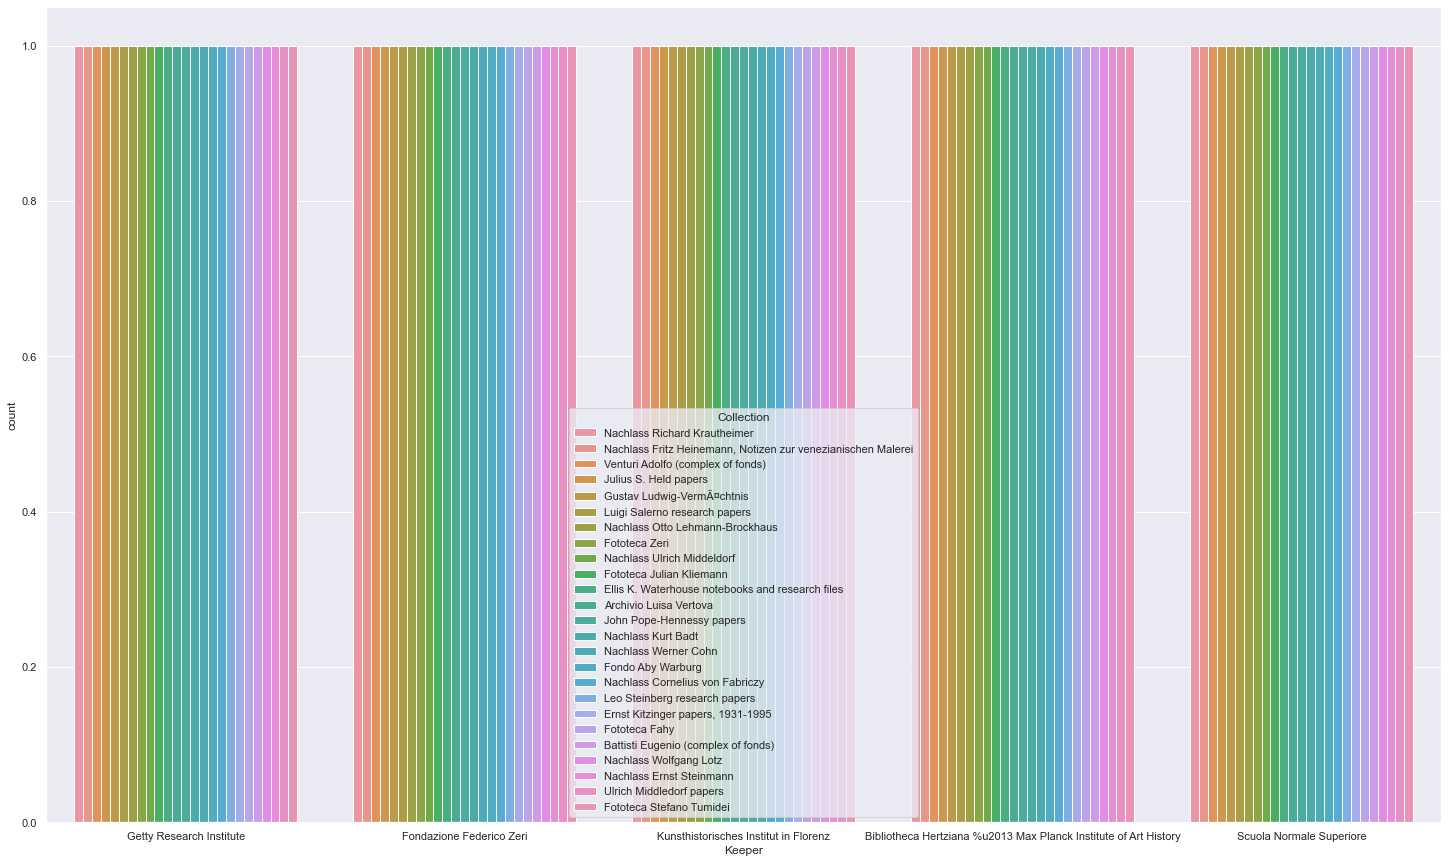

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (25, 15)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Keeper", hue="Collection", data=df) #every keeper has all the collections

C:\Users\giulm\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


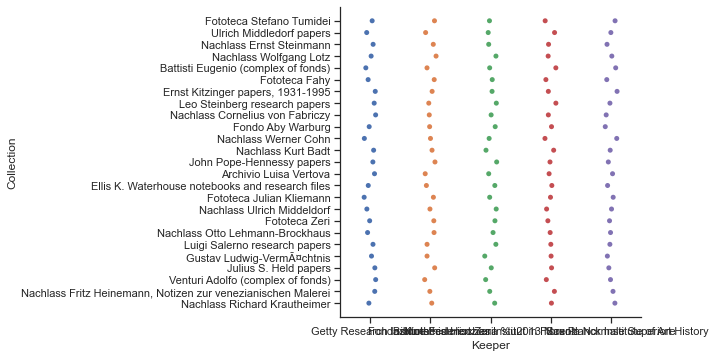

In [33]:

import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme(style="ticks")

g = sns.catplot(x="Keeper", y="Collection", data=df)



# 


In [34]:

import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('collection_keeper_periods_without_dupes.csv') as csvfile:
    historians = [] 
    periods = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) # create the list of unique periods
        if row[1] not in periods:
            periods.append(row[1]) # create the list of unique periods
    print(historians)
    print(periods)
    periods.sort()
    periods_zeros_matrix = np.array(np.zeros(( len(periods), len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): # loop over periods and their index position  
        for j, period in enumerate(periods):
            with open('collection_keeper_periods_without_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == period and row[0] == histo:  
                        periods_zeros_matrix[j][i] = int(periods_zeros_matrix[j][i])+1
    
    periods_zeros_matrix
    
# put everything together
data["Historians"] = historians
for i, period in enumerate(periods):
    data[period] = list(periods_zeros_matrix[i])
print(data)

['Nachlass Richard Krautheimer', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei', 'Venturi Adolfo (complex of fonds)', 'Julius S. Held papers', 'Gustav Ludwig-VermÃ¤chtnis', 'Luigi Salerno research papers', 'Nachlass Otto Lehmann-Brockhaus', 'Fototeca Zeri', 'Nachlass Ulrich Middeldorf', 'Fototeca Julian Kliemann', 'Ellis K. Waterhouse notebooks and research files', 'Archivio Luisa Vertova', 'John Pope-Hennessy papers', 'Nachlass Kurt Badt', 'Nachlass Werner Cohn', 'Fondo Aby Warburg', 'Nachlass Cornelius von Fabriczy', 'Leo Steinberg research papers', 'Ernst Kitzinger papers, 1931-1995', 'Fototeca Fahy', 'Battisti Eugenio (complex of fonds)', 'Nachlass Wolfgang Lotz', 'Nachlass Ernst Steinmann', 'Ulrich Middledorf papers', 'Fototeca Stefano Tumidei']
['Getty Research Institute', 'Fondazione Federico Zeri', 'Kunsthistorisches Institut in Florenz', 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History', 'Scuola Normale Superiore']
{'Historians': ['Nachlass Ric

In [45]:
#the collections can be found in EVERY institute
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
import random

output_file("bar_nested_colormapped_coll_keep.html")

periods = ['Battisti Eugenio (complex of fonds)', 'Julius S. Held papers', 'Leo Steinberg research papers', 'Nachlass Otto Lehmann-Brockhaus', 'Nachlass Cornelius von Fabriczy', 'Fototeca Stefano Tumidei', 'Fototeca Fahy', 'John Pope-Hennessy papers', 'Ellis K. Waterhouse notebooks and research files', 'Gustav Ludwig-Vermächtnis', 'Nachlass Werner Cohn', 'Nachlass Ulrich Middeldorf', 'Nachlass Wolfgang Lotz', 'Fototeca Zeri', 'Fondo Aby Warburg', 'Fototeca Julian Kliemann', 'Nachlass Richard Krautheimer', 'Nachlass Ernst Steinmann', 'Nachlass Kurt Badt', 'Venturi Adolfo (complex of fonds)', 'Ulrich Middledorf papers', 'Luigi Salerno research papers', 'Archivio Luisa Vertova', 'Ernst Kitzinger papers, 1931-1995', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei']
historians = ['Getty Research Institute', 'Scuola Normale Superiore', 'Kunsthistorisches Institut in Florenz', 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History', 'Fondazione Federico Zeri']
data = {'Historians': ['Ernst Kitzinger papers, 1931-1995', 'Nachlass Werner Cohn', 'Fototeca Fahy', 'Nachlass Cornelius von Fabriczy', 'Archivio Luisa Vertova', 'Nachlass Wolfgang Lotz', 'Ellis K. Waterhouse notebooks and research files', 'Fondo Aby Warburg', 'Nachlass Richard Krautheimer', 'Nachlass Ulrich Middeldorf', 'Fototeca Julian Kliemann', 'Gustav Ludwig-Vermächtnis', 'Leo Steinberg research papers', 'Fototeca Zeri', 'Battisti Eugenio (complex of fonds)', 'Nachlass Kurt Badt', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei', 'Nachlass Ernst Steinmann', 'Ulrich Middledorf papers', 'Fototeca Stefano Tumidei', 'Julius S. Held papers', 'John Pope-Hennessy papers', 'Luigi Salerno research papers', 'Venturi Adolfo (complex of fonds)', 'Nachlass Otto Lehmann-Brockhaus'], 'Bibliotheca Hertziana %u2013 Max Planck Institute of Art History': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Fondazione Federico Zeri': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Getty Research Institute': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Kunsthistorisches Institut in Florenz': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'Scuola Normale Superiore': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}
number_of_colors = 40 # pick random colors for the countries
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]


x = [ (historian, period) for historian in historians for period in periods ]
counts = sum(zip(data['Getty Research Institute'], data['Scuola Normale Superiore'], data['Kunsthistorisches Institut in Florenz'], data['Bibliotheca Hertziana %u2013 Max Planck Institute of Art History'], data['Fondazione Federico Zeri']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=650, width=7000, title="Collection Counts by Keeper",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=periods, start=1, end=2))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.55
p.xgrid.grid_line_color = None

show(p) #it is not so user friendly

plotting collections and periods

In [38]:
#relations between collections and periods

import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()


# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')


    
query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/>
    PREFIX wdt: <http://www.wikidata.org/prop/direct/>
    PREFIX art: <https://w3id.org/artchives/>
    SELECT DISTINCT ?Collection ?Period
    WHERE {
        ?collect wdt:P170 ?artHistorian ;
                 rdfs:label ?Collection ;
                 art:hasSubjectPeriod ?per .
        ?per rdfs:label ?Period
    }
    GROUP BY ?Collection ?Period
    """)

with open('coll_periodo.csv', 'w') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',' , quoting=csv.QUOTE_ALL)
    csv_writer.writerow(['Collection', 'Period'])
    for Collection, Period in query_result:
        csv_writer.writerow([Collection.strip(), Period.lower().strip()]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('coll_periodo.csv', encoding = 'latin-1', error_bad_lines=False)
# print the first 5 rows
data.head(30)

Collection         Period
0     Archivio Luisa Vertova  neoclassicism
1     Archivio Luisa Vertova  neoclassicism
2   Fototeca Stefano Tumidei   16th century
3   Fototeca Stefano Tumidei   16th century
4   Fototeca Stefano Tumidei   16th century
5   Fototeca Stefano Tumidei   16th century
6   Fototeca Stefano Tumidei   16th century
7   Fototeca Stefano Tumidei   16th century
8   Fototeca Stefano Tumidei   16th century
9   Fototeca Stefano Tumidei   16th century
10  Fototeca Stefano Tumidei   16th century
11  Fototeca Julian Kliemann   17th century
12  Fototeca Julian Kliemann   17th century
13  Fototeca Julian Kliemann   17th century
14  Fototeca Julian Kliemann   17th century
15  Fototeca Julian Kliemann   17th century
16  Fototeca Julian Kliemann   17th century
17  Fototeca Julian Kliemann   17th century
18    Nachlass Wolfgang Lotz   17th century
19    Nachlass Wolfgang Lotz   17th century
20    Nachlass Wolfgang Lotz   17th century
21    Nachlass Wolfgang Lotz   17th century
22    Nachlass Wolfgang Lotz   17th century
23    Nachlass Wolfgang Lotz   17th century
24    Nachlass Wolfgang Lotz   17th century
25        Nachlass Kurt Badt   16th century
26        Nachlass Kurt Badt   16th century
27        Nachlass Kurt Badt   16th century
28        Nachlass Kurt Badt   16th century
29        Nachlass Kurt Badt   16th century

In [39]:
import pandas as pd
file_name = "coll_periodo.csv"
file_name_output = "coll_periodo_no_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')
#delete the duplicates creating a new file: periods and collections without duplicates

# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")

In [40]:
df = pd.read_csv("coll_periodo_no_dupes.csv", delimiter=',', encoding = "utf8")
df.columns = df.columns.str.replace(' ', '')
    #prova con writerow, o creare dataFrame con pandasdata.drop_duplicates('nameKeeper', keep= 'last'))
df.drop_duplicates("Collection", keep= "last")
df.drop_duplicates("Period", keep="last")
#df.head(30)
#df =df.set_index("Birthplace")
#df = df.drop("Forl�", axis=0)


df.head(80)

Collection         Period
0                              Archivio Luisa Vertova  neoclassicism
1                            Fototeca Stefano Tumidei   16th century
2                            Fototeca Julian Kliemann   17th century
3                              Nachlass Wolfgang Lotz   17th century
4                                  Nachlass Kurt Badt   16th century
..                                                ...            ...
69                           Fototeca Julian Kliemann        baroque
70                  Ernst Kitzinger papers, 1931-1995  byzantine art
71                          Gustav Ludwig-Vermächtnis   16th century
72  Nachlass Fritz Heinemann, Notizen zur venezian...      mannerism
73                       Nachlass Richard Krautheimer    renaissance

[74 rows x 2 columns]

In [41]:
import pandas_profiling as pp
pp.ProfileReport(df.drop_duplicates('Collection', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Period', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

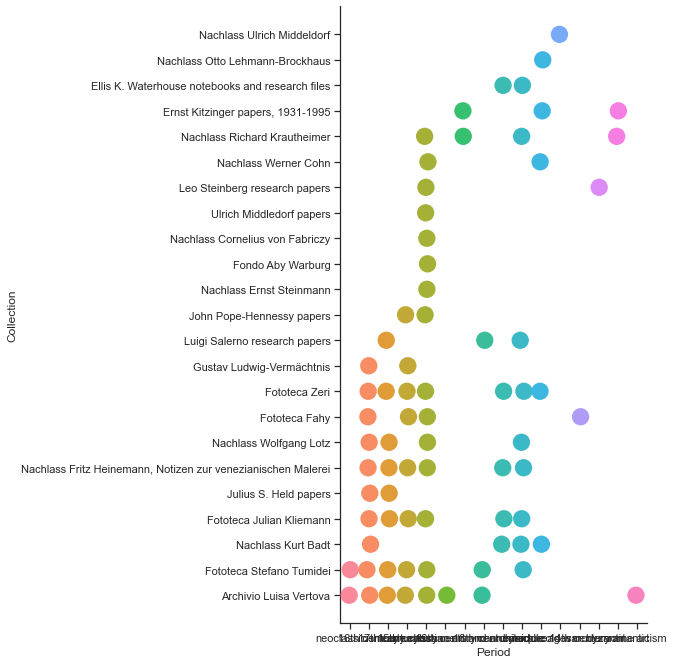

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
#collection*period first viz
ax = sns.catplot(x="Period", y="Collection", sizes=(300, 300),data=df, height=9.2)

In [43]:
#collection*period matrix
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
with open('coll_periodo_no_dupes.csv') as csvfile:
    collections = [] 
    periods = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in collections:
            collections.append(row[0]) # create the list of unique periods
        if row[1] not in periods:
            periods.append(row[1]) # create the list of unique periods
    print(collections)
    print(periods)
    periods.sort()
    periods_zeros_matrix = np.array(np.zeros(( len(periods), len(collections) ))) # rows, columns
    
    for i, coll in enumerate(collections): # loop over periods and their index position  
        for j, period in enumerate(periods):
            with open('coll_periodo_no_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == period and row[0] == coll:  
                        periods_zeros_matrix[j][i] = int(periods_zeros_matrix[j][i])+1
    
    periods_zeros_matrix
    
# put everything together
data["Collection"] = collections
for i, period in enumerate(periods):
    data[period] = list(periods_zeros_matrix[i])
print(data)

['Archivio Luisa Vertova', 'Fototeca Stefano Tumidei', 'Fototeca Julian Kliemann', 'Nachlass Wolfgang Lotz', 'Nachlass Kurt Badt', 'Fototeca Fahy', 'Nachlass Richard Krautheimer', 'Fototeca Zeri', 'Nachlass Ernst Steinmann', 'Ellis K. Waterhouse notebooks and research files', 'Nachlass Werner Cohn', 'Fondo Aby Warburg', 'Nachlass Otto Lehmann-Brockhaus', 'Julius S. Held papers', 'Nachlass Cornelius von Fabriczy', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei', 'Nachlass Ulrich Middeldorf', 'Ulrich Middledorf papers', 'Gustav Ludwig-VermÃ¤chtnis', 'Luigi Salerno research papers', 'Leo Steinberg research papers', 'Ernst Kitzinger papers, 1931-1995', 'John Pope-Hennessy papers']
['neoclassicism', '16th century', '17th century', '15th century', 'renaissance', '19th century', 'early christian art and architecture', '18th century', 'mannerism', 'baroque', 'middle ages', 'cold war', '14th century', 'modern art', 'byzantine art', 'romanticism']
{'Collection': ['Archivio Luisa V

In [46]:
#plot the artistic periods curated in the correspondent collection
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import GnBu3, OrRd3
from bokeh.plotting import figure
import random

output_file("bar_coll_periods.html")

collections = ['Fototeca Zeri', 'Ellis K. Waterhouse notebooks and research files', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei', 'Ernst Kitzinger papers, 1931-1995', 'Nachlass Wolfgang Lotz', 'Nachlass Richard Krautheimer', 'Fototeca Julian Kliemann', 'Nachlass Kurt Badt', 'Nachlass Werner Cohn', 'Fototeca Fahy', 'Archivio Luisa Vertova', 'Fototeca Stefano Tumidei', 'Luigi Salerno research papers', 'Ulrich Middledorf papers', 'Nachlass Ernst Steinmann', 'Gustav Ludwig-Vermächtnis', 'Nachlass Otto Lehmann-Brockhaus', 'Julius S. Held papers', 'Fondo Aby Warburg', 'John Pope-Hennessy papers', 'Nachlass Ulrich Middeldorf', 'Leo Steinberg research papers', 'Nachlass Cornelius von Fabriczy']
periods = ['16th century', 'mannerism', '17th century', 'middle ages', 'early christian art and architecture', '15th century', 'baroque', 'neoclassicism', 'renaissance', 'romanticism', '18th century', 'byzantine art', 'cold war', 'modern art', '19th century', '14th century']
data = {'Collection': ['Fototeca Zeri', 'Ellis K. Waterhouse notebooks and research files', 'Nachlass Fritz Heinemann, Notizen zur venezianischen Malerei', 'Ernst Kitzinger papers, 1931-1995', 'Nachlass Wolfgang Lotz', 'Nachlass Richard Krautheimer', 'Fototeca Julian Kliemann', 'Nachlass Kurt Badt', 'Nachlass Werner Cohn', 'Fototeca Fahy', 'Archivio Luisa Vertova', 'Fototeca Stefano Tumidei', 'Luigi Salerno research papers', 'Ulrich Middledorf papers', 'Nachlass Ernst Steinmann', 'Gustav Ludwig-Vermächtnis', 'Nachlass Otto Lehmann-Brockhaus', 'Julius S. Held papers', 'Fondo Aby Warburg', 'John Pope-Hennessy papers', 'Nachlass Ulrich Middeldorf', 'Leo Steinberg research papers', 'Nachlass Cornelius von Fabriczy'], '14th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '15th century': [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], '16th century': [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], '17th century': [1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], '18th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '19th century': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'baroque': [1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'byzantine art': [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'cold war': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 'early christian art and architecture': [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'mannerism': [1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'middle ages': [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'modern art': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0], 'neoclassicism': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'renaissance': [1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0], 'romanticism': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}
number_of_colors = 16 # pick random colors
palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

p = figure(y_range=collections, plot_width=950, plot_height=750, x_range=(-18, 18), title="Artistic Periods per Collection",
           toolbar_location=None, tools="hover", tooltips="$name: @$name")

p.hbar_stack(periods, y='Collection', width=0, height=0.8, color=palette, source=ColumnDataSource(data),
             legend_label=["%s" % x for x in periods])

#p.hbar_stack(periods, y='historians', height=0.9, color=OrRd3, source=ColumnDataSource(imports),
 #            legend_label=["%s imports" % x for x in years])
p.unapply_theme()
p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "top_left"
p.axis.minor_tick_line_color = None
p.outline_line_color = None

show(p)

query and plot the relation between keeper and the period treated in the correspondent collection stored in it

In [116]:
import rdflib
import csv
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import pprint


wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")
#we do not need to use sparqlwrapper wikidata endpoint!

# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')

query_keepers = g.query('''
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX wdp: <http://www.wikidata.org/wiki/Property:>
PREFIX art: <https://w3id.org/artchives/>
PREFIX wd: <http://www.wikidata.org/entity/>
SELECT DISTINCT  ?Period ?Keeper
WHERE {
 ?keep a wd:Q31855 ; 
         rdfs:label ?Keeper ; 
         wdt:P17 ?country .
 ?coll art:hasSubjectPeriod ?peri .
 ?country rdfs:label ?nameCountry .
 ?peri rdfs:label ?Period . 
}
GROUP BY  ?Period ?Keeper 
''') 


with open('keepers.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_ALL)
    csv_writer.writerow(["Period", "Keeper"])
    # access the rows of the query results
    for Period, Keeper in query_keepers:
        # write in the csv
        csv_writer.writerow([Period.lower().strip(), Keeper.strip()])        

        
import pandas as pd
data = pd.read_csv('keepers.csv', encoding = 'Latin-1')
# print the first 5 rows
data.head(20)

Period                    Keeper
0    renaissance  Getty Research Institute
1    renaissance  Getty Research Institute
2    renaissance  Getty Research Institute
3    renaissance  Getty Research Institute
4    renaissance  Getty Research Institute
5    renaissance  Getty Research Institute
6    renaissance  Getty Research Institute
7    renaissance  Getty Research Institute
8    renaissance  Getty Research Institute
9    renaissance  Getty Research Institute
10   renaissance  Getty Research Institute
11  15th century  Getty Research Institute
12  15th century  Getty Research Institute
13  15th century  Getty Research Institute
14  15th century  Getty Research Institute
15  15th century  Getty Research Institute
16  15th century  Getty Research Institute
17  15th century  Getty Research Institute
18  17th century  Getty Research Institute
19  17th century  Getty Research Institute

In [117]:
import pandas as pd
file_name = "keepers.csv"
file_name_output = "kep_per_without_dupes.csv"

df = pd.read_csv(file_name, sep=",", engine = "python", encoding = 'latin-1')
df.columns = df.columns.str.replace(' ', '')


# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=",", encoding="utf8")


df = pd.read_csv("kep_per_without_dupes.csv", delimiter=',', encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')
   
df.drop_duplicates('Period', keep= 'last')
df.drop_duplicates('Keeper', keep= 'last')

#df.head(30)
#df =df.set_index("Birthplace")
#df = df.drop("Forl�", axis=0)
#df = df.drop([13], axis=0)
df.head(40)

Period                    Keeper
0                            renaissance  Getty Research Institute
1                           15th century  Getty Research Institute
2                           17th century  Getty Research Institute
3                              mannerism  Getty Research Institute
4                                baroque  Getty Research Institute
5                             modern art  Getty Research Institute
6                           16th century  Getty Research Institute
7                          byzantine art  Getty Research Institute
8                          neoclassicism  Getty Research Institute
9                           18th century  Getty Research Institute
10                           middle ages  Getty Research Institute
11                          19th century  Getty Research Institute
12  early christian art and architecture  Getty Research Institute
13                              cold war  Getty Research Institute
14                          14th century  Getty Research Institute
15                           romanticism  Getty Research Institute
16                           renaissance  Scuola Normale Superiore
17                          15th century  Scuola Normale Superiore
18                          17th century  Scuola Normale Superiore
19                             mannerism  Scuola Normale Superiore
20                               baroque  Scuola Normale Superiore
21                            modern art  Scuola Normale Superiore
22                          16th century  Scuola Normale Superiore
23                         byzantine art  Scuola Normale Superiore
24                         neoclassicism  Scuola Normale Superiore
25                          18th century  Scuola Normale Superiore
26                           middle ages  Scuola Normale Superiore
27                          19th century  Scuola Normale Superiore
28  early christian art and architecture  Scuola Normale Superiore
29                              cold war  Scuola Normale Superiore
30                          14th century  Scuola Normale Superiore
31                           romanticism  Scuola Normale Superiore
32                           renaissance  Fondazione Federico Zeri
33                          15th century  Fondazione Federico Zeri
34                          17th century  Fondazione Federico Zeri
35                             mannerism  Fondazione Federico Zeri
36                               baroque  Fondazione Federico Zeri
37                            modern art  Fondazione Federico Zeri
38                          16th century  Fondazione Federico Zeri
39                         byzantine art  Fondazione Federico Zeri

In [118]:

import pandas_profiling as pp

pp.ProfileReport(df.drop_duplicates('Period', keep= 'last'))

pp.ProfileReport(df.drop_duplicates('Keeper', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

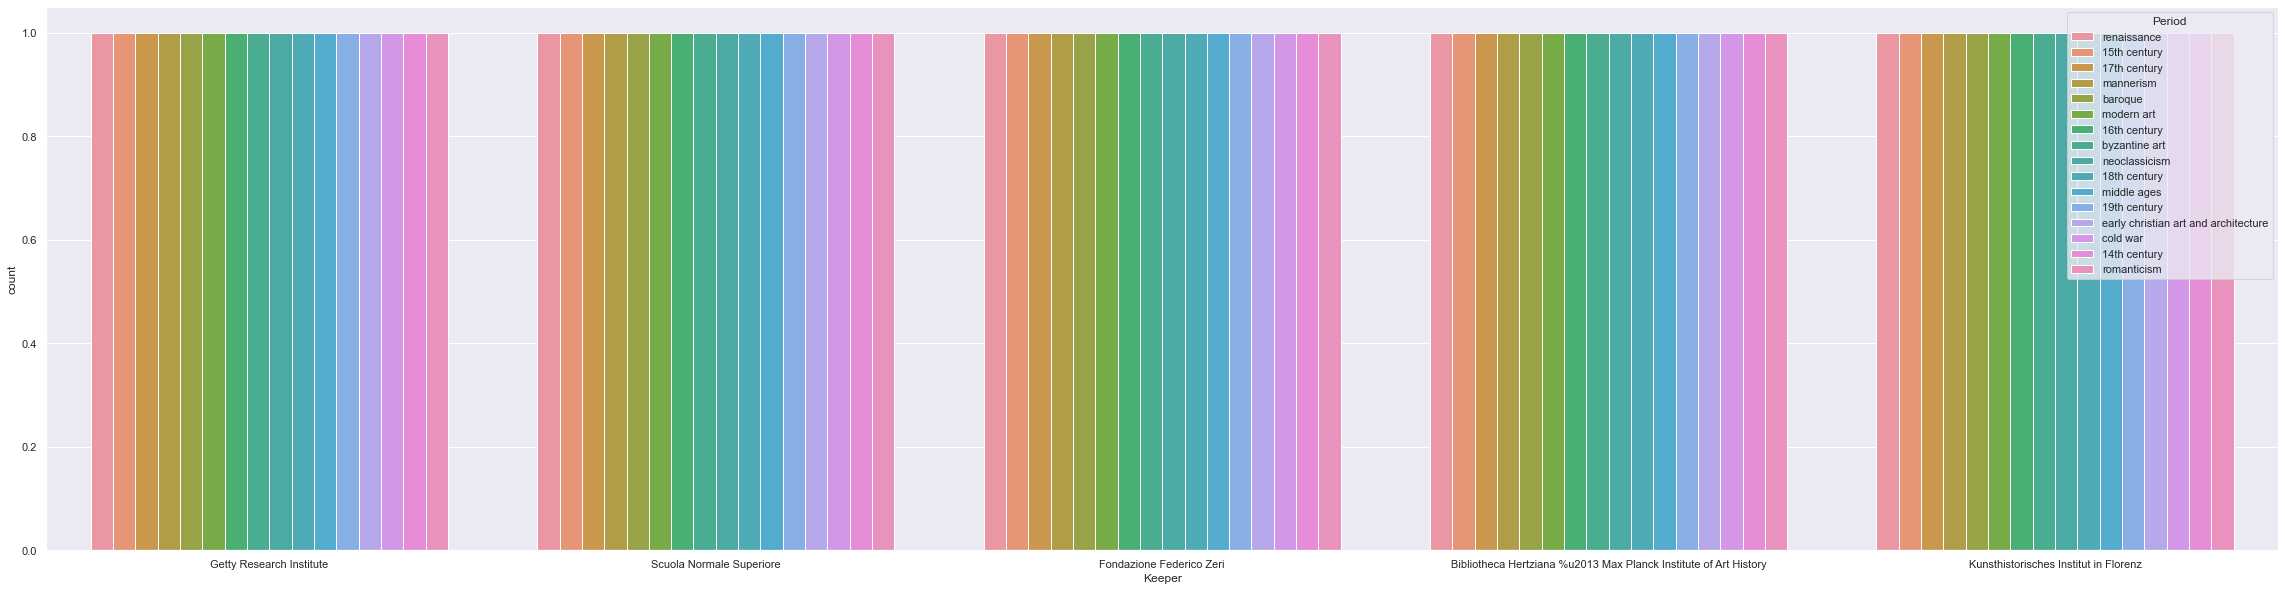

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
fig_dims = (40, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="Keeper", hue="Period", data=df)


try plotting periods per institutes: all periods are treated in the collections stored in the institutes